<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Autocorrelation" data-toc-modified-id="Autocorrelation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Autocorrelation</a></span></li></ul></div>

In [100]:
from datetime import datetime
now = datetime.now()
print(f'Time right now: {now}')
print("Micro-Second", now.microsecond)
print("Second", now.second)
print("Minute", now.minute)
print("Hour", now.hour)
print("Day", now.day)
print("Month",now.month)
print("Year", now.year)
now_ = datetime.now()
print(f'Creating a new object means an new time: {now_.microsecond}')

Time right now: 2019-01-27 16:23:15.350898
Micro-Second 350898
Second 15
Minute 23
Hour 16
Day 27
Month 1
Year 2019
Creating a new object means an new time: 351650


In [101]:
# Import timedelta from datetime library
from datetime import timedelta

# Time deltas represent time as an amount as opposed to a fixed position.
offset = timedelta(days=1, seconds=20)

# the time delta has attributes that allow us to extract values from it.
print('offset days', offset.days)
print('offset seconds', offset.seconds)
print('offset microseconds', offset.microseconds)

offset days 1
offset seconds 20
offset microseconds 0


In [102]:
print("Future: ", now + offset)
print("Past: ", now - offset)

Future:  2019-01-28 16:23:35.350898
Past:  2019-01-26 16:22:55.350898


> Note: The largest value a Time Delta can hold is 'Days'. I.e. you can't say your want you an offset to be 2 years, 44 days and 12 hours. You would have to manually convert the time of those years to be represented in days.

In [103]:
# Get my  dataset from my GitHub
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/MaartenKool/CookBooks-Sources/master/DeWitteJuffer.csv', sep=';')

In [104]:
df.columns

Index(['Molen', 'Datum', 'Totale productie (kWh)', 'Per winddeel (kWh)',
       '9 Winddelen (kWh)'],
      dtype='object')

In [105]:
df['kWh'] = df['Totale productie (kWh)']
df = df[['Datum', 'kWh']]
df.drop([0], axis = 0, inplace = True) #first record is empty


In [106]:
df.dtypes

Datum    object
kWh       int64
dtype: object

In [107]:
df['Datum'] = pd.to_datetime(df['Datum'])

In [108]:
df.dtypes

Datum    datetime64[ns]
kWh               int64
dtype: object

In [109]:
df.index = pd.to_datetime(df['Datum'])

In [110]:
df.describe()

,kWh
count,1837.000000
mean,8679.555797
std,9000.244003
min,-234.000000
25%,2420.000000
50%,5351.000000
75%,11901.000000
max,46138.000000


In [111]:
df['day'] = df['Datum'].dt.day
df['month'] = df['Datum'].dt.month
df['year'] = df['Datum'].dt.year
df['dayname'] = df['Datum'].dt.day_name() #[:5]
df['monthyear'] = (df['year'].astype(str) + df['month'].astype(str)).astype(int)

In [112]:
df.head()

,Datum,kWh,day,month,year,dayname,monthyear
Datum,,,,,,,
2019-01-11,2019-01-11,7644,11,1,2019,Friday,20191
2019-01-10,2019-01-10,2698,10,1,2019,Thursday,20191
2019-01-09,2019-01-09,20922,9,1,2019,Wednesday,20191
2019-01-08,2019-01-08,38468,8,1,2019,Tuesday,20191
2019-01-07,2019-01-07,17742,7,1,2019,Monday,20191


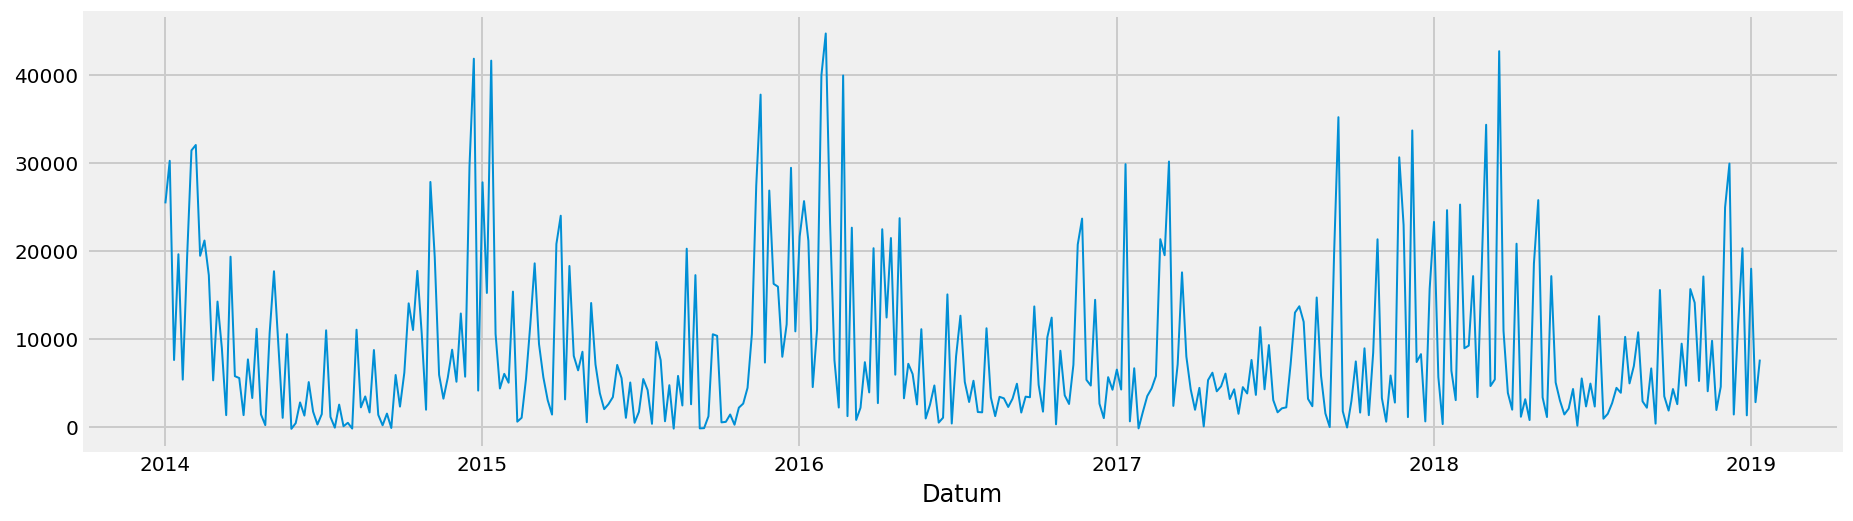

In [113]:
df['kWh'][::5].plot(figsize=(14,4), lw=1); #plotting every 5th for readability

## Missing data

In [ ]:
# create some missing data
df.drop(df.index[1:5:2], inplace=True)

In [16]:
df.head()

,Datum,kWh,day,month,year,dayname,monthyear
Datum,,,,,,,
2019-01-11,2019-01-11,7644,11,1,2019,Friday,20191
2019-01-09,2019-01-09,20922,9,1,2019,Wednesday,20191
2019-01-07,2019-01-07,17742,7,1,2019,Monday,20191
2019-01-06,2019-01-06,2806,6,1,2019,Sunday,20191
2019-01-05,2019-01-05,13408,5,1,2019,Saturday,20191


In [18]:
# https://stackoverflow.com/questions/19324453/add-missing-dates-to-pandas-dataframe

# Insert missing dates in the index

start = df['Datum'].min()

end = df['Datum'].max()

daterange = pd.date_range(start, end)


df.set_index(df['Datum'],drop=True,inplace=True)
df.index = pd.DatetimeIndex(df.index)
df = df.reindex(daterange,fill_value=0)
df['Datum'] = pd.DatetimeIndex(df.index)

df.tail()

,Datum,kWh,day,month,year,dayname,monthyear
2019-01-07,2019-01-07,17742,7,1,2019,Monday,20191
2019-01-08,2019-01-08,0,0,0,0,0,0
2019-01-09,2019-01-09,20922,9,1,2019,Wednesday,20191
2019-01-10,2019-01-10,0,0,0,0,0,0
2019-01-11,2019-01-11,7644,11,1,2019,Friday,20191


In [21]:
df['Datum'] = pd.to_datetime(df['Datum'])
df.index = pd.to_datetime(df['Datum'])
df = df.resample('D').mean()

In [23]:
df.tail()

,kWh,day,month,year,monthyear
Datum,,,,,
2019-01-07,17742,7,1,2019,20191
2019-01-08,0,0,0,0,0
2019-01-09,20922,9,1,2019,20191
2019-01-10,0,0,0,0,0
2019-01-11,7644,11,1,2019,20191


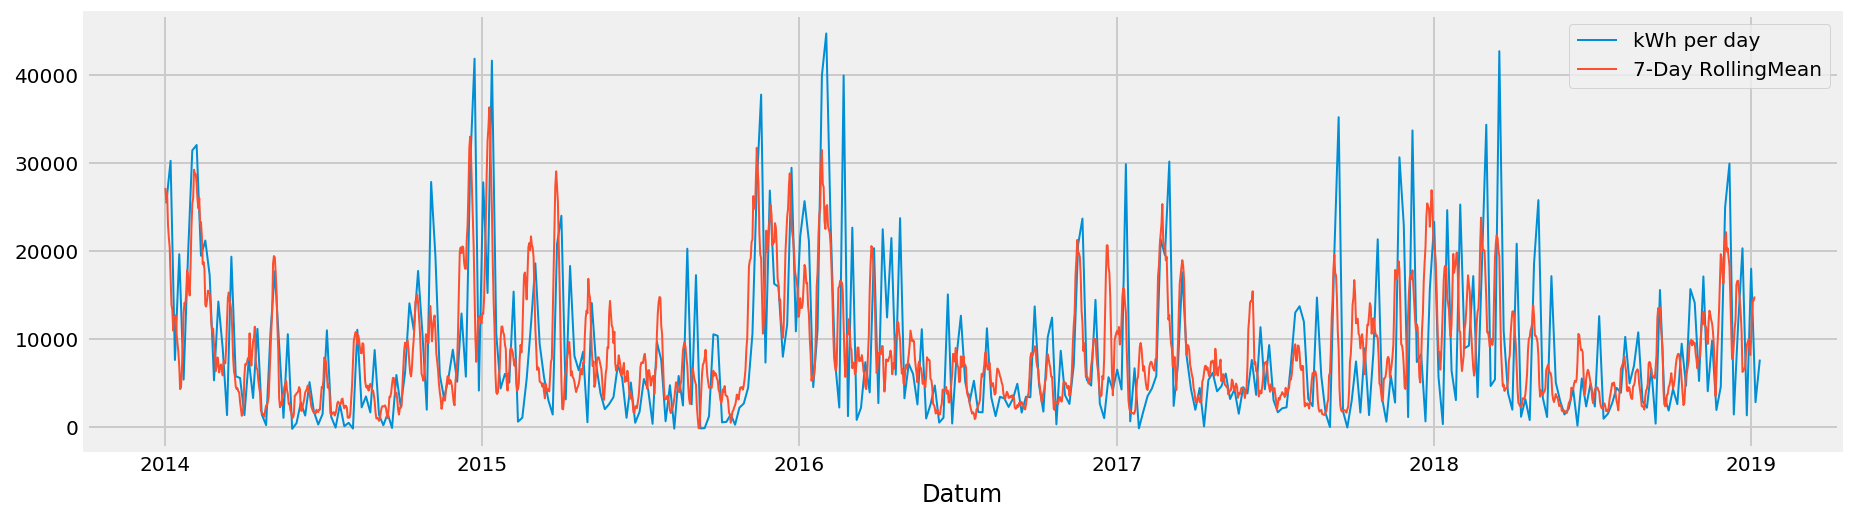

In [114]:
df['kWh'][::5].plot(figsize=(14,4), lw=1, label='kWh per day')
df['kWh'].rolling(window=7).mean().plot(lw=1,label='7-Day RollingMean')
plt.legend(loc='best');

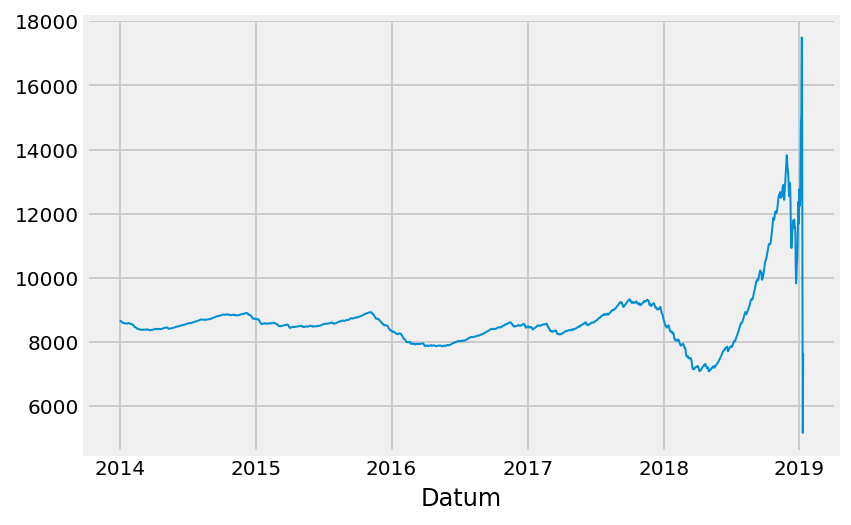

In [115]:
df['kWh'].expanding().mean().plot(lw=1,label='7-Day RollingMean');

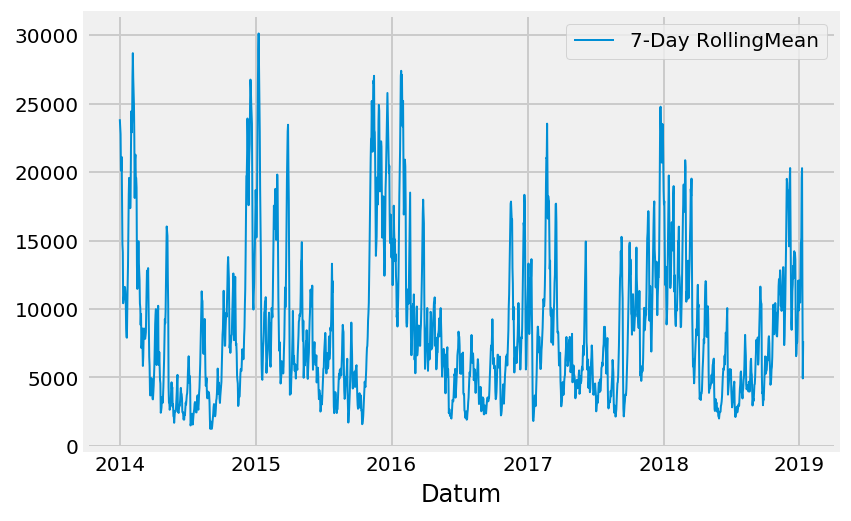

In [117]:
df['kWh'].ewm(span=10).mean().plot(lw=1,label='7-Day RollingMean')
plt.legend();

### Autocorrelation
In time series data, autocorrelation is a measure of how correlated a variable is with itself.
Specifically, autocorrelation measures how closely related earlier values are with values occurring later in time.
Examples of autocorrelation:
- In stock market data the stock price at one point is correlated with the stock price of the point directly prior in time.
- In sales data, sales on a Saturday are likely correlated with sales on the next Saturday and the previous Saturday, as well as other days to more or less extent.

In this example, of a wind generator, an autocorrelation within 1 or 2 lags at most may be expected. For wind occurring depends on frontal systems passing, typically these last 2 to 3 days.

<Figure size 864x504 with 0 Axes>

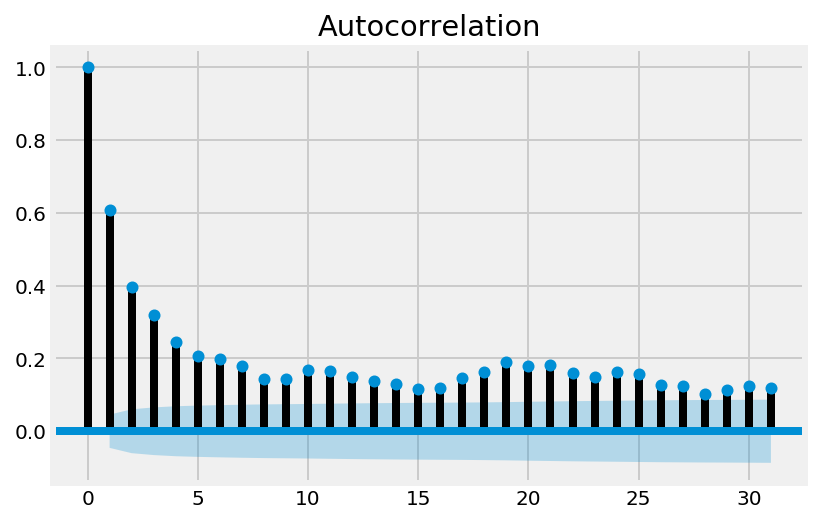

In [118]:
from statsmodels.graphics.tsaplots import plot_acf
# so the statsmodels function creates the list of lags to calculate
# and does this for us, and includes a plotting function too

plt.figure(figsize=(12, 7))
plot_acf(df['kWh'].values, lags=31)
plt.show();

The blue shaded part joins the boundaries of an approximate 95% interval for the individual correlations assuming the series is independent. So if your data were white noise, about 5% of those autocorrelations would be expected to lie outside those bounds.

The blue band indicates confidence level bounds for the autocorrelations resulting from a true effect or just by chance.
With the default alpha=0.05 we are sure about any peak sticking out of the blue band that it indicates a true autocorrelation with a confidence level of 95 %. On the other hand, this means that we should expect that 5 % (i.e. one in twenty) of the peaks will be outside the blue band just by chance.

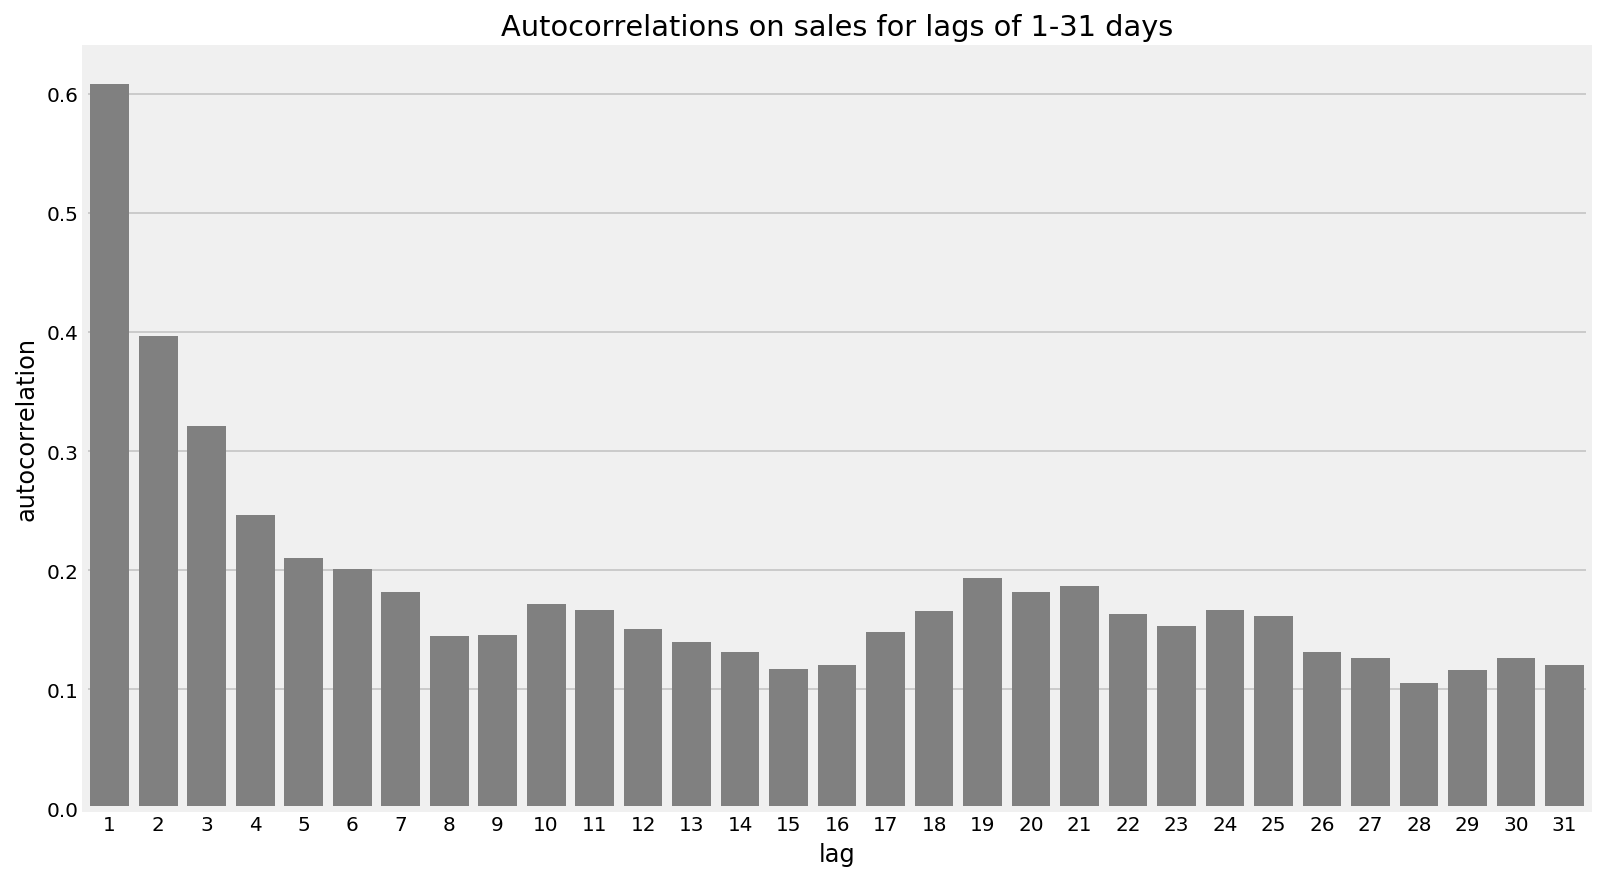

In [151]:
# calculating a range of autocorrelation lags 1-31 days and plotting

s1_autocorrelations = [df['kWh'].autocorr(lag=l) for l in range(1, 32)]
s1autocorr = pd.DataFrame(
    {'lag': list(range(1, 32)), 'autocorrelation': s1_autocorrelations})
plt.figure(figsize=(12, 7))
sns.barplot(x=s1autocorr.lag, y=s1autocorr.autocorrelation, color='grey')
plt.title("Autocorrelations on sales for lags of 1-31 days")
plt.show()

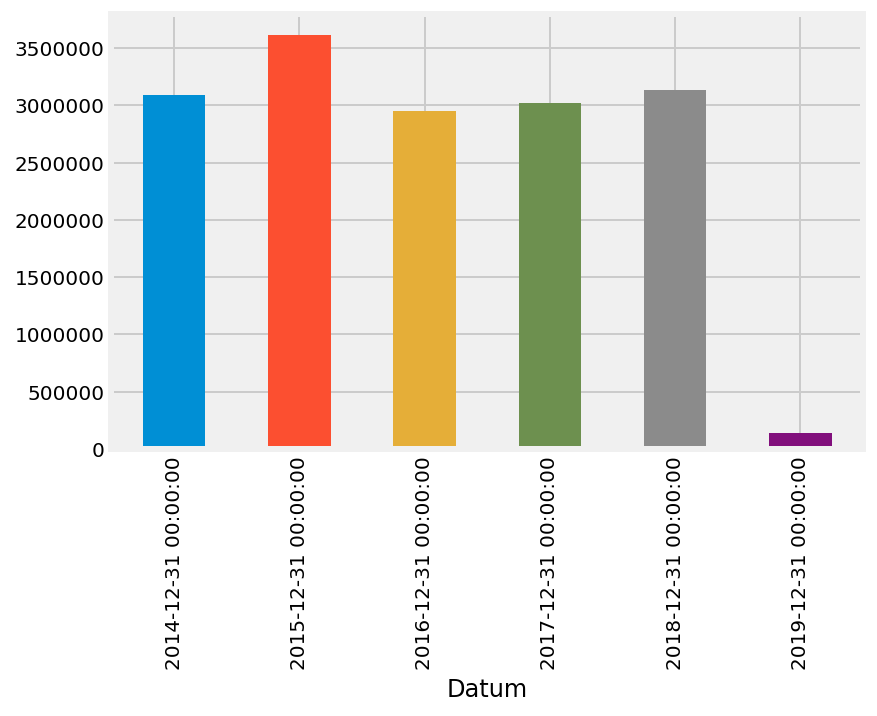

In [119]:
# resample = 
df['kWh'].resample('A-DEC').sum().plot(kind='bar');

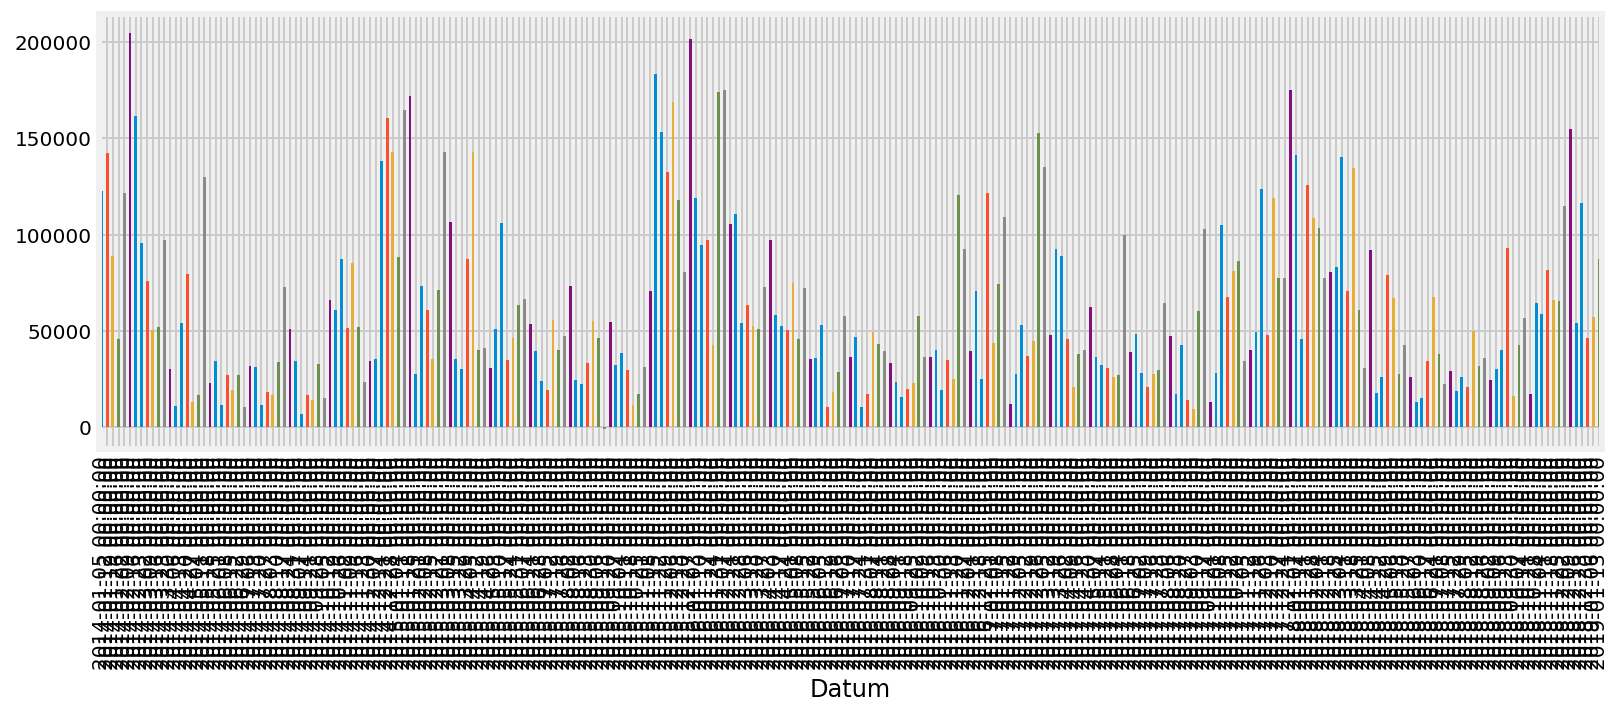

In [120]:
df['kWh'].resample('W-SUN').sum().plot(kind='bar', figsize = (12,4))

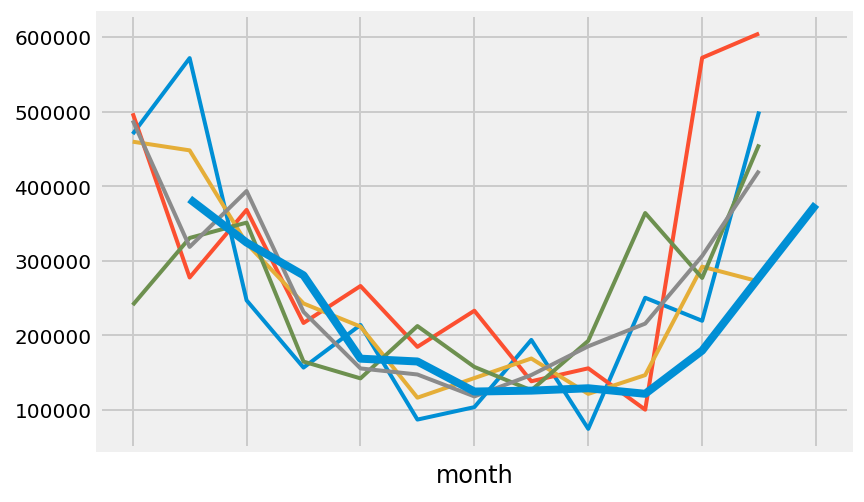

In [139]:
df['kWh'].groupby([df['year'], df['month']]).sum()[:12].plot(lw=2)
df['kWh'].groupby([df['year'], df['month']]).sum()[12:24].plot(lw=2)
df['kWh'].groupby([df['year'], df['month']]).sum()[24:36].plot(lw=2)
df['kWh'].groupby([df['year'], df['month']]).sum()[36:48].plot(lw=2)
df['kWh'].groupby([df['year'], df['month']]).sum()[48:60].plot(lw=2)
df['kWh'].groupby([df['year'], df['month']]).sum()[60:72].plot(lw=2)

In [97]:
monthavg = df['kWh'].groupby(df['month']).sum()/6#[1:]
monthavg[1:]

month
1     376097.666667
2     324586.833333
3     280676.166667
4     168865.333333
5     165094.666667
6     124788.333333
7     125990.166667
8     129177.333333
9     121768.666667
10    179655.666667
11    278019.000000
12    375809.833333
Name: kWh, dtype: float64

In [123]:
df['kWh'].groupby([df['year'], df['month']]).sum()#[25:37]

year  month
2014  1        470159
      2        571993
      3        247140
      4        156932
      5        214113
      6         87172
      7        103852
      8        194042
      9         74764
      10       250545
      11       219682
      12       500397
2015  1        497986
      2        277759
      3        368446
      4        216755
      5        266324
      6        184736
      7        233170
      8        138550
      9        155924
      10       100437
      11       572415
      12       605012
2016  1        459899
      2        448260
      3        323400
      4        242887
      5        211903
      6        116543
                ...  
      8        169103
      9        121634
      10       146822
      11       292310
      12       272278
2017  1        240806
      2        330772
      3        351336
      4        164946
      5        142434
      6        212622
      7        157793
      8        126460
      9        19282

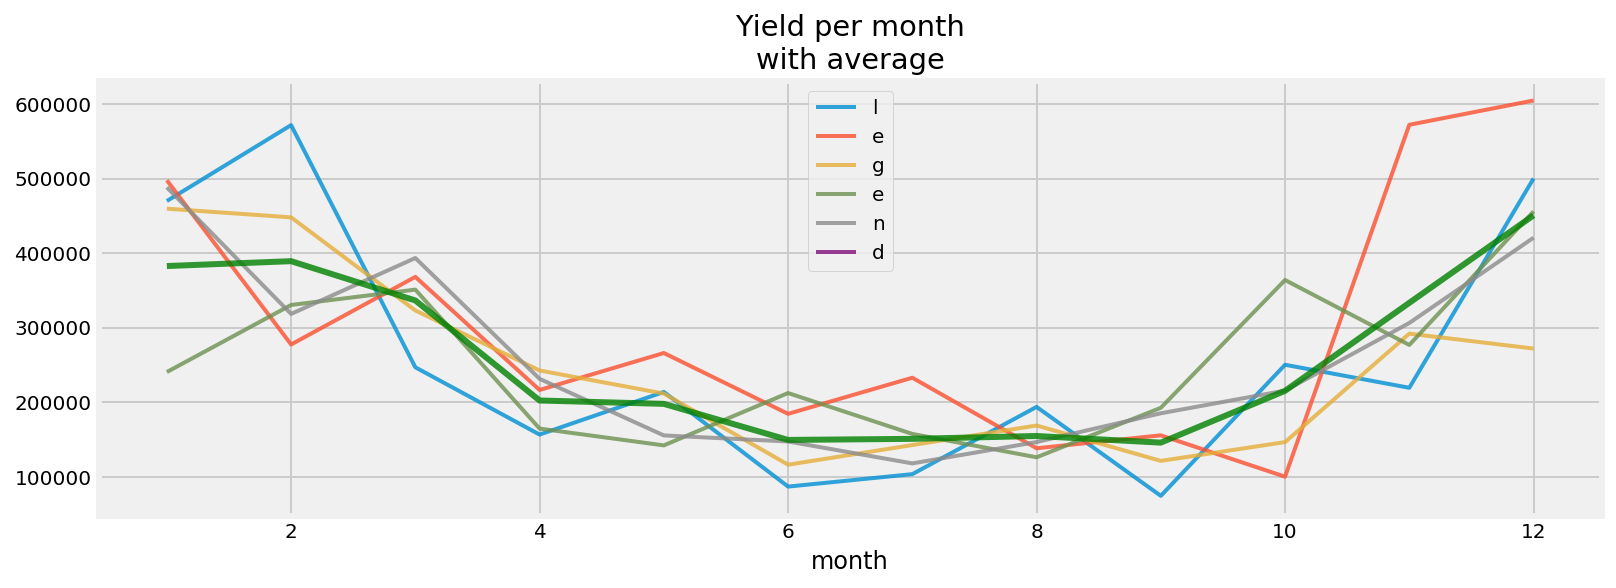

In [173]:
# ax, fig = plt.subplots(figsize=(12,4))
df['kWh'].groupby([df['month'], df['year']]).sum().unstack().plot(lw=2, figsize=(12,4), alpha=0.8)
df['kWh'].groupby([df['year'], df['month']]).sum().unstack().mean().plot(label='avg', color='G',lw=3, alpha=0.800)
plt.title('Yield per month\nwith average')
plt.legend()
plt.show();

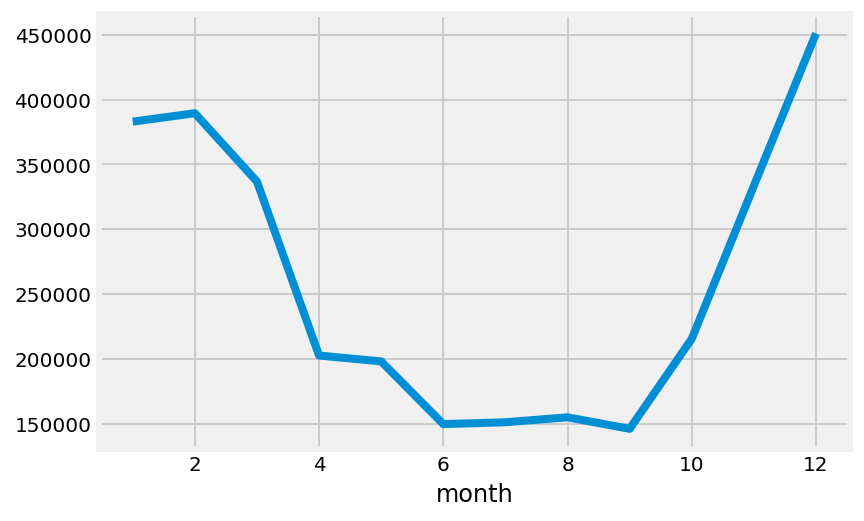

### Partial autocorrelation and the partial autocorrelation function (PACF)
Another important chart to diagnose your timeseries is the partial autocorrelation chart (PACF). This is similar to the autocorrelation, but instead of just the correlation at increasing lags, it is the correlation at a given lag controlling for the effect of previous lags.


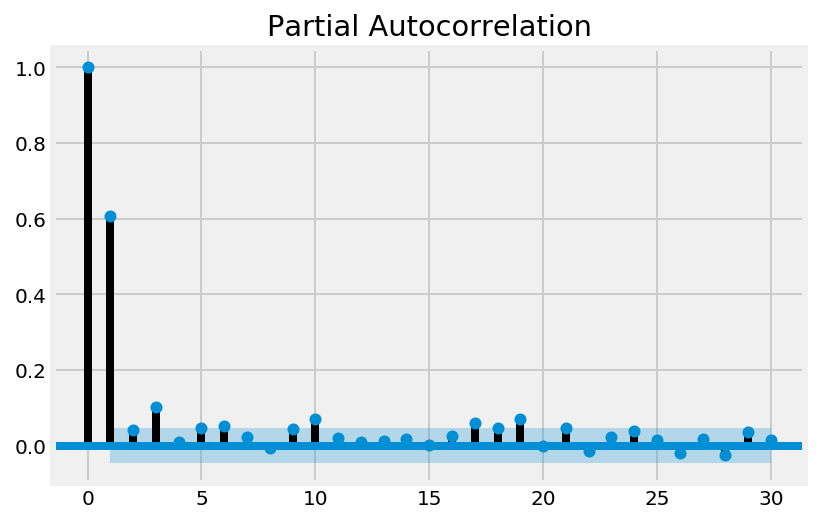

In [174]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df['kWh'].values, lags=30)
plt.show()

In [176]:
def autocorr_plots(y, lags=None):
    fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
    plot_acf(y, lags=lags, ax=ax[0])
    plot_pacf(y, lags=lags, ax=ax[1])
    return fig, ax

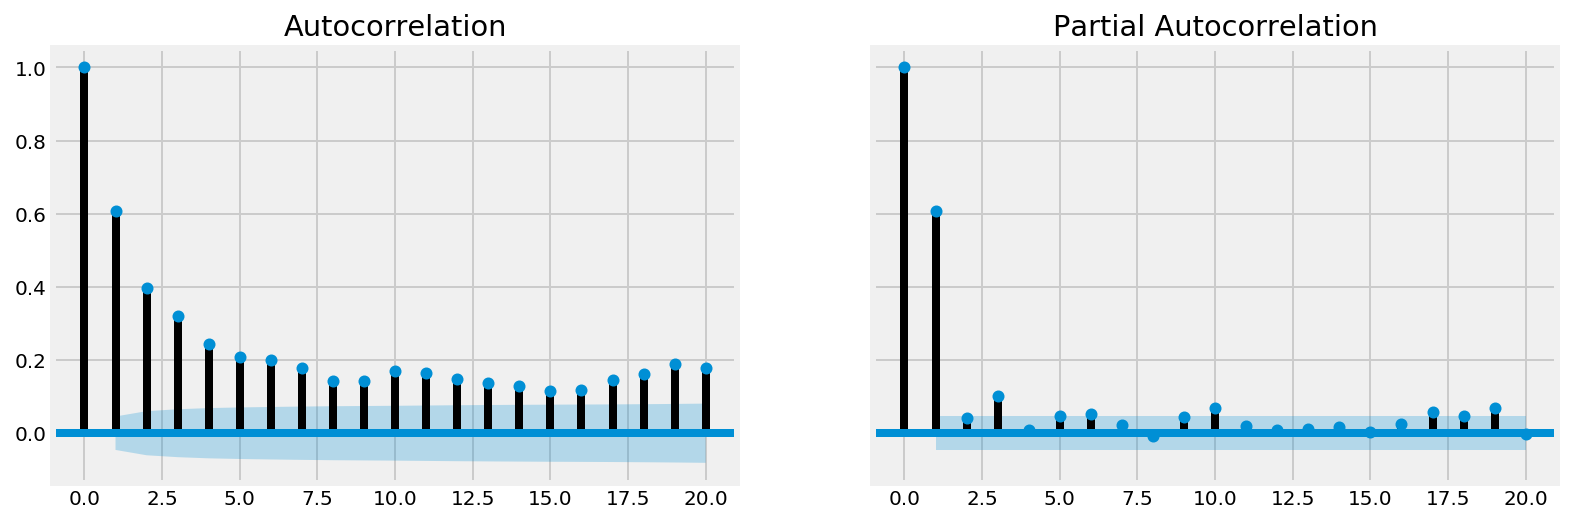

In [177]:
fig, ax = autocorr_plots(df['kWh'].values,lags=20)